<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [89]:
# df=pd.read_csv("bank-additional-full.csv")

df=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")

# Uploaded the file to session storage. Not fetching using the http link.
# print(df.head())
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values
# print(type(X))
# print(type(y))
# X.shape
# y.shape

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df.iloc[:, -1].values)
# X=np.array([[]])
# for col in [1,2,3,4,5,6,7,8,9,14]:
#   le=LabelEncoder()
#   temp=le.fit_transform(df.iloc[:, col].values)
#   np.append(X,temp)
# df_dummies=pd.get_dummies(df, columns=["job","marital"])
# df_dummies
y

array([0, 0, 0, ..., 0, 1, 0])

In [103]:
df_dummies=pd.get_dummies(df)
df_dummies.drop('y_no', inplace=True, axis=1)
df_dummies.drop('y_yes', inplace=True, axis=1)
df_dummies.drop('duration', inplace=True, axis=1)
df_dummies.dropna()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [104]:
df_dummies

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [53]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3,4,5,6,7,8,9,14])], remainder='passthrough')
# X=ct.fit_transform(X)



In [101]:
# df_dummies.columns.values.tolist()

In [55]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# y=le.fit_transform(y)

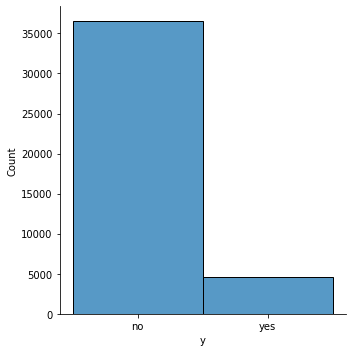

In [102]:
sns.displot(df, x="y")

In [105]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [111]:
from sklearn.model_selection import train_test_split
X=df_dummies.iloc[:, :].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50, stratify=y)

In [112]:
X_train.shape[0]/X.shape[0]

0.7999902884335244

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, max_depth=3)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [190]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score
from sklearn import metrics
scores = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")

In [191]:
np.mean(scores)

0.898391502276176

In [193]:
from sklearn.dummy import DummyClassifier
dummy_clf=DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train,y_train)
# y_dummy=dummy_clf.predict(X_train)
dummy_clf.score(X_train,y_train)

0.8000303490136571

In [194]:
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring="accuracy")
dummy_scores

array([0.80576631, 0.79484067, 0.80728376, 0.80182094, 0.79301973,
       0.79605463, 0.80576631, 0.80212443, 0.79939302, 0.79817906])

In [198]:
print("RF Classifier score : ",accuracy_score(y_train,classifier.predict(X_train)))
print("Dummy Classifier score : ",accuracy_score(y_train, dummy_clf.predict(X_train)))

RF Classifier score :  0.8986039453717755
Dummy Classifier score :  0.8008497723823975


In [199]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 50, 200, 300], 'max_depth': [3,5,7,10],'criterion': ["entropy"]},
              {'n_estimators': [100, 50, 200, 300], 'max_depth': [3,5,7,10], 'criterion': ["gini"]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.09 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}


In [201]:
bestClassifier=RandomForestClassifier(n_estimators=200, max_depth=10)
bestClassifier.fit(X_train,y_train)
accuracy_score(y_train,bestClassifier.predict(X_train))

0.9137177541729894

In [202]:
best_scores = cross_val_score(bestClassifier, X_train, y_train, cv=10, scoring="accuracy")

In [205]:
np.mean(best_scores)

0.9006676783004552

In [204]:
accuracy_score(y_test,bestClassifier.predict(X_test))

0.9011896091284293

In [217]:
importances=grid_search.best_estimator_.feature_importances_
importances

array([0.03960111, 0.01896016, 0.07553457, 0.02365548, 0.10762036,
       0.04775519, 0.06813743, 0.15687909, 0.1433421 , 0.00422228,
       0.00639789, 0.00190203, 0.00248988, 0.00257342, 0.00455561,
       0.00239927, 0.00325901, 0.00394658, 0.00356889, 0.00203285,
       0.00157897, 0.00352467, 0.0048933 , 0.00481339, 0.00068425,
       0.00344761, 0.00288786, 0.00412986, 0.00400162, 0.00018917,
       0.00370499, 0.00592397, 0.00303764, 0.01113778, 0.00757989,
       0.        , 0.00499045, 0.00197552, 0.00503973, 0.00406539,
       0.0020601 , 0.00404856, 0.0137724 , 0.02187873, 0.00749985,
       0.00272312, 0.00095754, 0.00299957, 0.00471729, 0.01085245,
       0.01840146, 0.00239968, 0.01306226, 0.00291272, 0.0053382 ,
       0.00711869, 0.00530939, 0.00508318, 0.00474343, 0.01385213,
       0.01135555, 0.04247441])

In [ ]:
top_3_idx = np.argsort(importances)[-3:]
top_3_values = [importances[i] for i in top_3_idx]

In [213]:
top_3_idx 

array([4, 8, 7])

In [215]:
print(df_dummies.columns.values.tolist()[4])
print(df_dummies.columns.values.tolist()[8])
print(df_dummies.columns.values.tolist()[7])

emp.var.rate
nr.employed
euribor3m


In [218]:
print("Error(test set) : ", 1-accuracy_score(y_test, bestClassifier.predict(X_test)))

Error(test set) :  0.09881039087157073


In [219]:
accuracy_score(y_test, bestClassifier.predict(X_test))

0.9011896091284293